<a href="https://colab.research.google.com/github/Amruta5199/handson-ml/blob/master/Final_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd #data manipulation library
import seaborn as sns
import matplotlib.pyplot as plt #data visuaizition
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets.samples_generator import make_blobs
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression # for linear Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
from pandas import Series, DataFrame
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler


from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving recs2015_public_v4-1.csv to recs2015_public_v4-1.csv


In [3]:
df=pd.read_csv('recs2015_public_v4-1.csv') 

In [4]:
df.head()

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,ZATTIC,ATTICFIN,ZATTICFIN,STORIES,ZSTORIES,PRKGPLC1,ZPRKGPLC1,SIZEOFGARAGE,ZSIZEOFGARAGE,KOWNRENT,ZKOWNRENT,YEARMADERANGE,ZYEARMADERANGE,OCCUPYYRANGE,ZOCCUPYYRANGE,STUDIO,ZSTUDIO,BEDROOMS,ZBEDROOMS,NCOMBATH,ZNCOMBATH,NHAFBATH,ZNHAFBATH,OTHROOMS,ZOTHROOMS,TOTROOMS,ZTOTROOMS,WALLTYPE,...,BTUFOWTH,BTUFONEC,DOLLARFO,DOLFOSPH,DOLFOWTH,DOLFONEC,TOTALBTU,TOTALDOL,TOTALBTUSPH,TOTALDOLSPH,TOTALBTUWTH,TOTALDOLWTH,TOTALBTUCOK,TOTALDOLCOK,TOTALBTUCDR,TOTALDOLCDR,TOTALBTUPL,TOTALDOLPL,TOTALBTUHTB,TOTALDOLHTB,TOTALBTUNEC,TOTALDOLNEC,WOODAMT,ZWOODAMT,WOODBTU,PELLETAMT,ZPELLETAMT,PELLETBTU,ELXBTU,PERIODEL,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,-2,0,0,-2,-2,20,0,1,0,2,0,1,0,7,0,8,0,-2,-2,3,0,2,0,1,0,4,0,7,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,48974.570,1406.10,12469.727,176.59,17535.625,248.33,985.448,13.96,1727.078,92.89,0.0,0.0,0.0,0.0,1749.457,94.09,-2.0,-2,0.0,-2.0,-2,0.0,3.412,1,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,-2,0,0,-2,-2,10,0,0,0,-2,-2,1,0,5,0,6,0,-2,-2,2,0,1,0,0,0,2,0,4,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,41534.000,1366.00,11570.020,380.52,7129.985,234.49,1006.820,33.11,0.000,0.00,0.0,0.0,0.0,0.0,3188.852,104.88,-2.0,-2,0.0,-2.0,-2,0.0,3.412,5,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,0,0,0,-2,-2,10,0,0,0,-2,-2,1,0,4,0,7,0,-2,-2,4,0,2,0,0,0,5,0,9,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,96548.160,2828.84,23499.517,601.17,18444.442,250.71,4650.068,168.36,1819.709,65.88,0.0,0.0,0.0,0.0,3553.130,128.64,-2.0,-2,0.0,-2.0,-2,0.0,3.412,1,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,0,0,0,-2,-2,10,0,1,0,2,0,1,0,2,0,7,0,-2,-2,3,0,2,0,0,0,4,0,7,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,89284.345,2102.98,52408.189,863.46,8077.839,114.62,384.600,15.02,1702.112,66.49,0.0,0.0,0.0,0.0,1905.175,74.42,-2.0,-2,0.0,-2.0,-2,0.0,3.412,1,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,0,1,0,0,0,20,0,1,0,1,0,1,0,4,0,8,0,-2,-2,3,0,2,0,0,0,3,0,6,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,36582.146,910.89,5339.841,67.87,17331.011,220.26,2265.816,28.80,1002.376,54.79,0.0,0.0,0.0,0.0,3586.574,153.47,-2.0,-2,0.0,-2.0,-2,0.0,3.412,1,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2


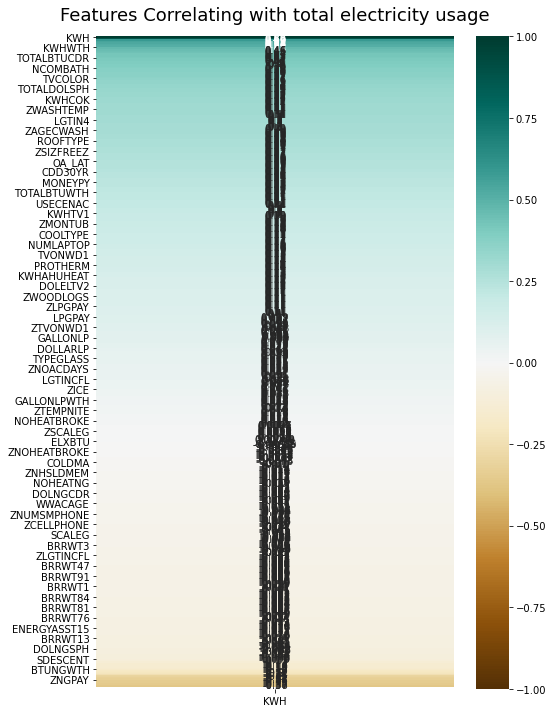

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['KWH']].sort_values(by='KWH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total electricity usage', fontdict={'fontsize':18}, pad=16);

In [6]:
df.drop(df.columns.difference(['KWH','TOTSQFT_EN','NCOMBATH','TOTROOMS','FUELPOOL','RECBATH','ROOFTYPE','OTHROOMS','WALLTYPE','HIGHCEIL','UGASHERE','POOL','SOLAR']), 1, inplace=True)

In [7]:
df.to_csv('electricity.csv', index=False)

In [8]:
dataframe = pd.read_csv("electricity.csv") 

In [9]:
dataframe.head()

,NCOMBATH,OTHROOMS,TOTROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR,TOTSQFT_EN,KWH
0,2,4,7,4,1,1,1,-2,-2,0,0,1808,5270.742
1,1,2,4,3,3,0,1,-2,-2,0,0,759,12173.000
2,2,5,9,2,5,0,1,-2,-2,0,0,2288,19655.394
3,2,4,7,3,5,1,0,-2,-2,0,0,2573,9852.535
4,2,3,6,1,5,0,1,-2,-2,0,0,1024,3115.655


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NCOMBATH    5686 non-null   int64  
 1   OTHROOMS    5686 non-null   int64  
 2   TOTROOMS    5686 non-null   int64  
 3   WALLTYPE    5686 non-null   int64  
 4   ROOFTYPE    5686 non-null   int64  
 5   HIGHCEIL    5686 non-null   int64  
 6   UGASHERE    5686 non-null   int64  
 7   POOL        5686 non-null   int64  
 8   FUELPOOL    5686 non-null   int64  
 9   RECBATH     5686 non-null   int64  
 10  SOLAR       5686 non-null   int64  
 11  TOTSQFT_EN  5686 non-null   int64  
 12  KWH         5686 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 577.6 KB


In [11]:
dataframe.describe()

,NCOMBATH,OTHROOMS,TOTROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR,TOTSQFT_EN,KWH
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000,5686.000000,5686.000000
mean,1.746395,3.358424,6.191347,2.832923,3.554344,0.246043,0.691699,-1.826416,-1.873901,0.077383,-0.39694,2081.443546,11028.934872
std,0.747473,1.621184,2.360918,1.613775,2.643281,0.698130,0.461832,0.625699,0.883005,0.267222,0.82412,1282.660286,7049.727589
min,0.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-2.00000,221.000000,59.078000
25%,1.000000,2.000000,5.000000,2.000000,3.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.00000,1100.500000,5926.525750
50%,2.000000,3.000000,6.000000,3.000000,5.000000,0.000000,1.000000,-2.000000,-2.000000,0.000000,0.00000,1773.500000,9549.351000
75%,2.000000,4.000000,8.000000,3.000000,5.000000,1.000000,1.000000,-2.000000,-2.000000,0.000000,0.00000,2766.000000,14557.606750
max,6.000000,14.000000,19.000000,9.000000,9.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.00000,8501.000000,63216.806000


In [12]:
print(dataframe.shape)

(5686, 13)


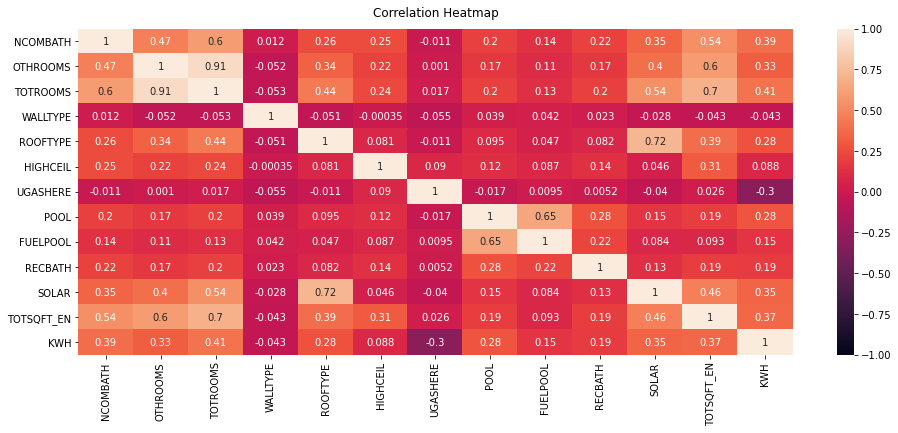

In [13]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [14]:
dataframe.corr()

,NCOMBATH,OTHROOMS,TOTROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR,TOTSQFT_EN,KWH
NCOMBATH,1.000000,0.468113,0.595061,0.012406,0.255189,0.251395,-0.010991,0.203965,0.136675,0.215394,0.349404,0.536527,0.386172
OTHROOMS,0.468113,1.000000,0.911568,-0.052073,0.339889,0.215031,0.001014,0.166687,0.107151,0.171873,0.395364,0.600105,0.325569
TOTROOMS,0.595061,0.911568,1.000000,-0.052504,0.442529,0.237381,0.017009,0.203517,0.128068,0.199020,0.536820,0.698421,0.411689
WALLTYPE,0.012406,-0.052073,-0.052504,1.000000,-0.051355,-0.000353,-0.054729,0.038657,0.041821,0.023052,-0.028184,-0.042671,-0.042966
ROOFTYPE,0.255189,0.339889,0.442529,-0.051355,1.000000,0.081354,-0.011417,0.095067,0.047143,0.082203,0.721502,0.389298,0.279588
HIGHCEIL,0.251395,0.215031,0.237381,-0.000353,0.081354,1.000000,0.090190,0.118050,0.087198,0.138361,0.046263,0.312061,0.088162
UGASHERE,-0.010991,0.001014,0.017009,-0.054729,-0.011417,0.090190,1.000000,-0.016866,0.009512,0.005206,-0.039670,0.025599,-0.301142
POOL,0.203965,0.166687,0.203517,0.038657,0.095067,0.118050,-0.016866,1.000000,0.645202,0.277342,0.153090,0.189555,0.282303
FUELPOOL,0.136675,0.107151,0.128068,0.041821,0.047143,0.087198,0.009512,0.645202,1.000000,0.218810,0.084024,0.092558,0.149274
RECBATH,0.215394,0.171873,0.199020,0.023052,0.082203,0.138361,0.005206,0.277342,0.218810,1.000000,0.125925,0.193462,0.187231


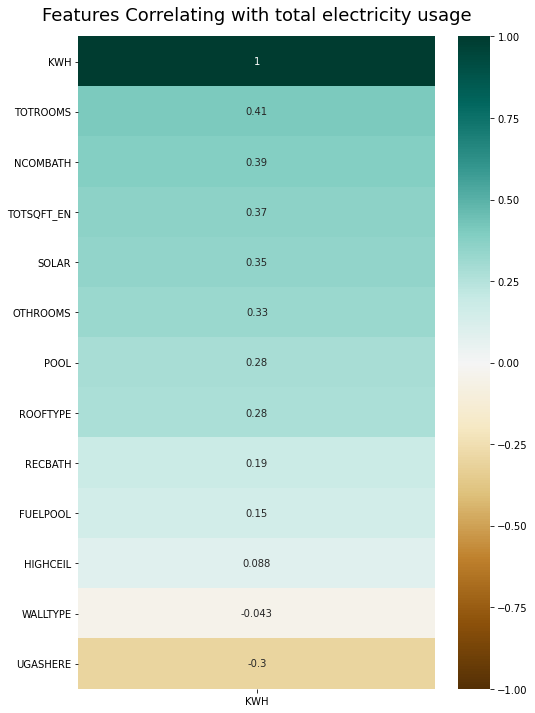

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['KWH']].sort_values(by='KWH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total electricity usage', fontdict={'fontsize':18}, pad=16);

In [16]:
 model = smf.ols('KWH ~ TOTSQFT_EN + NCOMBATH + TOTROOMS + OTHROOMS + WALLTYPE + ROOFTYPE + HIGHCEIL + UGASHERE + POOL + FUELPOOL + RECBATH + SOLAR',data = dataframe )
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    KWH   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:27:15   Log-Likelihood:                -57213.
No. Observations:                5686   AIC:                         1.145e+05
Df Residuals:                    5673   BIC:                         1.145e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.109e+04    472.977     23.457      0.0

In [17]:
y = dataframe['KWH']

In [18]:
X = dataframe[['TOTSQFT_EN','NCOMBATH','TOTROOMS','OTHROOMS', 'WALLTYPE',  'ROOFTYPE', 'HIGHCEIL', 'UGASHERE', 'POOL', 'FUELPOOL', 'RECBATH', 'SOLAR']]

In [19]:
#Splitting The Data into Training And Testing Dataset Set a variable X equal to the numerical features of the dataframe and a variable y equal to the "Total kilowatts per hour" column

train_X, test_X,train_y,test_y = train_test_split(X, y, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%


In [20]:
train_X.head()

,TOTSQFT_EN,NCOMBATH,TOTROOMS,OTHROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR
1967,1880,2,7,4,7,5,1,1,-2,-2,0,0
2531,1392,2,6,3,3,5,0,1,-2,-2,0,0
3781,2964,1,6,2,5,5,0,0,-2,-2,0,0
5387,1142,1,5,2,2,5,0,0,-2,-2,0,0
372,741,1,4,2,2,2,0,1,-2,-2,0,-2


In [21]:
test_X.head()

,TOTSQFT_EN,NCOMBATH,TOTROOMS,OTHROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR
625,2106,1,5,3,1,3,0,1,-2,-2,1,0
2815,1249,2,8,5,2,5,0,0,-2,-2,0,0
3935,3337,2,7,4,2,5,0,1,-2,-2,0,0
4058,1050,2,3,1,1,5,1,0,-2,-2,0,0
5414,2550,1,7,4,2,5,0,1,-2,-2,0,0


In [22]:
# Training the Model
#Linear Regression Create an instance of a LinearRegression() model named lm.

lm = LinearRegression() #Create an instance of a LinearRegression() model named lm.

model = lm.fit(train_X,train_y)

In [23]:
predictions = lm.predict(train_X)
print(predictions)

[ 9344.41732437  9742.4919985  13604.08456009 ...  9998.56263792
 13564.7096753   8021.7221321 ]


In [24]:
lm.score(train_X,train_y)

0.34823954644018984

In [25]:
# print coefficients
lm.coef_

array([ 3.03736944e-01,  1.39823030e+03,  9.77183100e+02, -6.39648074e+02,
       -1.69481058e+02,  1.31582171e+02, -2.05909096e+02, -4.48166243e+03,
        2.19407116e+03, -3.11143907e+02,  9.64302001e+02,  5.31276003e+02])

In [26]:
lm.intercept_

10677.12444104669

In [27]:
#  Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict(test_X)

In [28]:
# Evaluating the Model Calculating the residual sum of squares and the explained variance score (R^2)
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))


MAE: 4352.475969180427
MSE: 35584025.93557112
RMSE: 5965.234776232292


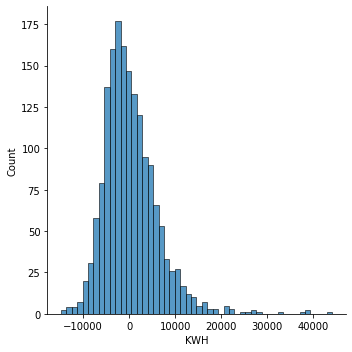

In [29]:
# Residuals
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

sns.displot((test_y-predictions),bins=50);

In [40]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
target_column = ['KWH'] ## create an object of the target variabble called 'target_column'
predictors = list(set(list(df.columns))-set(target_column))## give the lis of alll features excluding KWH
df[predictors] = df[predictors]/df[predictors].max()## normalizes the predictors
df.describe()## displays the summary

,NCOMBATH,OTHROOMS,TOTROOMS,WALLTYPE,ROOFTYPE,HIGHCEIL,UGASHERE,POOL,FUELPOOL,RECBATH,SOLAR,TOTSQFT_EN,KWH
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000,5686.000000,5686.000000
mean,0.291066,0.239887,0.325860,0.314769,0.394927,0.246043,0.691699,-1.826416,-0.234238,0.077383,-0.39694,0.244847,11028.934872
std,0.124579,0.115799,0.124259,0.179308,0.293698,0.698130,0.461832,0.625699,0.110376,0.267222,0.82412,0.150883,7049.727589
min,0.000000,0.071429,0.052632,0.111111,-0.222222,-2.000000,0.000000,-2.000000,-0.250000,0.000000,-2.00000,0.025997,59.078000
25%,0.166667,0.142857,0.263158,0.222222,0.333333,0.000000,0.000000,-2.000000,-0.250000,0.000000,0.00000,0.129455,5926.525750
50%,0.333333,0.214286,0.315789,0.333333,0.555556,0.000000,1.000000,-2.000000,-0.250000,0.000000,0.00000,0.208623,9549.351000
75%,0.333333,0.285714,0.421053,0.333333,0.555556,1.000000,1.000000,-2.000000,-0.250000,0.000000,0.00000,0.325373,14557.606750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,63216.806000


In [42]:
X = df[predictors].values ## creates array of the indepedent variables
y = df[target_column].values ## creates array of the depedent variables which is KWH

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3980, 12)
(1706, 12)


In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# linear regression 
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

5705.850081224953
0.3519504211249582
5602.0581518738945
0.3516626145573699


In [45]:
## ridge regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

5705.850297169638
0.35195037207254265
5602.046709108977
0.3516652631427688


In [46]:
## lasso regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

5705.850099587066
0.3519504169539548
5602.061922146366
0.35166174187474064


In [47]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

5737.558482293758
0.3447277595470647
5625.433074860656
0.3462408737351227


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Alpha:1.00, R2:0.35, MSE:35099084.46, RMSE:5924.45


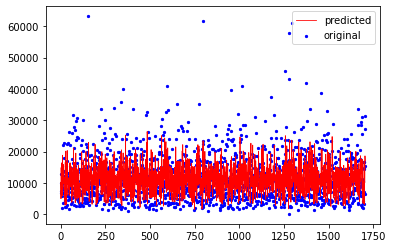

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
Alpha:0.10, R2:0.353, MSE:35098204.63, RMSE:5924.37


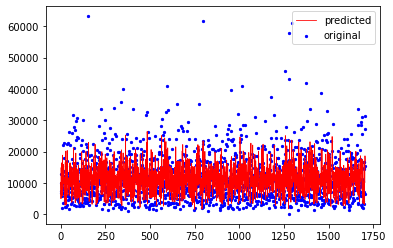

In [48]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

pd = Lasso()
x = dataframe[['TOTSQFT_EN','NCOMBATH','TOTROOMS','OTHROOMS', 'WALLTYPE',  'ROOFTYPE', 'HIGHCEIL', 'UGASHERE', 'POOL', 'FUELPOOL', 'RECBATH', 'SOLAR']]
y = dataframe['KWH']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

model = Lasso().fit(x, y) 
print(model)
score = model.score(x, y)
ypred = model.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(x,y)
print(lassocv)
score = lassocv.score(x,y)
ypred = lassocv.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

Alpha:0.000001, R2:0.353, MSE:32158769.25, RMSE:5670.87
Alpha:0.000010, R2:0.353, MSE:32158769.26, RMSE:5670.87
Alpha:0.000100, R2:0.353, MSE:32158770.14, RMSE:5670.87
Alpha:0.001000, R2:0.353, MSE:32158856.13, RMSE:5670.88
Alpha:0.010000, R2:0.353, MSE:32165623.90, RMSE:5671.47
Alpha:0.100000, R2:0.349, MSE:32351050.42, RMSE:5687.80
Alpha:0.500000, R2:0.329, MSE:33328438.35, RMSE:5773.08
Alpha:1.000000, R2:0.305, MSE:34543469.53, RMSE:5877.37
R2:0.287, MSE:33949475.97, RMSE:5826.62


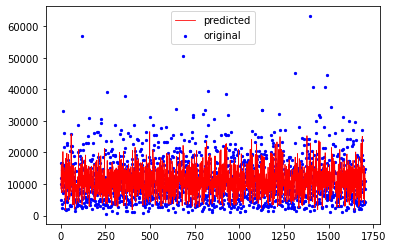

1.0
[31732282.35540524 31732282.35303305 31732282.3293123  31732282.09211207
 31732279.72113467 31732256.11363368 31732153.43731201 31732030.23060541]
R2:0.326, MSE:33926225.89, RMSE:5824.62


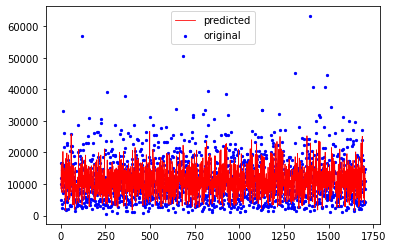

In [49]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

bq = Ridge
x = dataframe[['TOTSQFT_EN','NCOMBATH','TOTROOMS','OTHROOMS', 'WALLTYPE',  'ROOFTYPE', 'HIGHCEIL', 'UGASHERE', 'POOL', 'FUELPOOL', 'RECBATH', 'SOLAR']]
y = dataframe['KWH']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(x,y) 
 score = model.score(x, y)
 pred_y = model.predict(x)
 mse = mean_squared_error(y, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

ridge_mod=Ridge(alpha=0.01, normalize=True).fit(xtrain,ytrain)
ypred = ridge_mod.predict(xtest)
score = model.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# RidgeCV method
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain)
print(ridge_mod.alpha_)
print(np.mean(ridge_mod.cv_values_, axis=0))

ypred = ridge_mod.predict(xtest)
score = ridge_mod.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Alpha:0.0001, R2:0.35, MSE:32158769.62, RMSE:5670.87
Alpha:0.0010, R2:0.35, MSE:32158806.37, RMSE:5670.87
Alpha:0.0100, R2:0.35, MSE:32162289.78, RMSE:5671.18
Alpha:0.1000, R2:0.35, MSE:32388996.84, RMSE:5691.13
Alpha:0.3000, R2:0.33, MSE:33239546.22, RMSE:5765.37
Alpha:0.5000, R2:0.32, MSE:34032830.46, RMSE:5833.77
Alpha:0.7000, R2:0.30, MSE:34686961.75, RMSE:5889.56
Alpha:1.0000, R2:0.29, MSE:35455231.54, RMSE:5954.43
R2:0.345, MSE:34489222.70, RMSE:5872.75


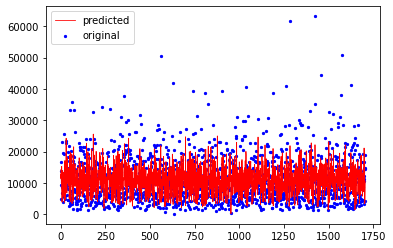

0.01
10892.818543498655
R2:0.345, MSE:34489222.70, RMSE:5872.75


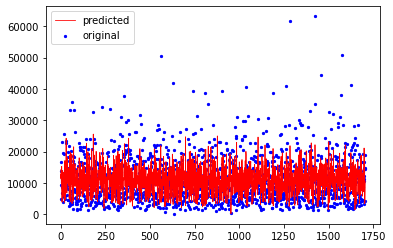

In [50]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

vf = ElasticNet()
x = dataframe[['TOTSQFT_EN','NCOMBATH','TOTROOMS','OTHROOMS', 'WALLTYPE',  'ROOFTYPE', 'HIGHCEIL', 'UGASHERE', 'POOL', 'FUELPOOL', 'RECBATH', 'SOLAR']]
y = dataframe['KWH']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
